In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, f1_score,classification_report

In [116]:
df = pd.read_csv('./data/FBPS-ValidationData.csv', delimiter= '\t')

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,age,engnat,gender,birthpos,birthn,submittime,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country,dateload,source,screensize,introelapse,testelapse,endelapse
0,4,4,4,5,5,4,3,4,4,5,1,4,1,1,1,3,1,5,1,2,1,5,3,1,4,1,30,1,2,2,2,2019-04-12 13:33:17,3,4,3,3,2,3,3,4,2,4,4,2,4,2,3,2,4,2,2,3,1,4,1,5,4,4,2,4,5,4,3,5,4,3,1,5,2,2,3,2,4,3,5,4,2,1,4,3,4,3,DE,2019-04-12 10:52:18,1,2,3,6592,10
1,5,5,5,4,2,5,5,5,5,5,5,4,1,3,4,3,3,3,2,3,1,2,5,4,2,3,19,2,2,1,3,2019-04-12 11:06:20,1,5,3,4,1,4,1,5,3,5,3,4,4,3,3,2,1,2,1,4,2,4,1,4,1,4,1,5,5,5,2,5,5,4,4,4,1,2,1,1,5,1,4,1,4,1,5,5,5,5,BE,2019-04-12 10:53:05,0,1,4,558,16
2,2,1,2,4,4,1,4,4,4,5,4,2,1,1,1,5,1,1,2,4,5,4,4,4,2,2,21,2,3,0,0,2019-04-12 11:03:28,1,4,4,4,2,2,2,4,2,5,4,2,5,2,4,3,4,4,2,2,1,5,1,5,1,5,1,4,5,4,1,5,4,2,1,5,4,2,1,2,4,1,4,1,4,1,4,4,4,3,IT,2019-04-12 10:53:45,2,2,15,415,5
3,2,1,3,2,4,3,3,3,3,5,3,4,2,3,4,3,1,1,3,2,3,4,3,2,4,4,21,1,2,1,2,2019-04-12 11:02:48,3,4,3,4,2,3,2,5,1,5,5,2,5,2,3,4,4,4,5,4,1,5,3,5,2,4,2,5,4,3,3,5,4,4,1,5,3,1,3,3,3,3,5,3,4,5,3,3,5,5,US,2019-04-12 10:56:25,0,2,9,203,7
4,2,1,4,5,2,5,4,4,2,5,1,2,4,1,5,3,1,5,5,5,4,4,4,4,2,1,19,1,2,1,3,2019-04-12 11:04:47,1,4,2,5,1,2,1,5,1,5,5,1,5,1,5,4,2,2,4,5,4,2,4,2,4,3,4,3,2,2,3,5,5,5,2,5,3,3,4,4,4,5,1,5,4,4,4,3,5,3,US,2019-04-12 10:56:51,0,2,4,263,15


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41841 entries, 0 to 41840
Data columns (total 89 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Q1           41841 non-null  int64 
 1   Q2           41841 non-null  int64 
 2   Q3           41841 non-null  int64 
 3   Q4           41841 non-null  int64 
 4   Q5           41841 non-null  int64 
 5   Q6           41841 non-null  int64 
 6   Q7           41841 non-null  int64 
 7   Q8           41841 non-null  int64 
 8   Q9           41841 non-null  int64 
 9   Q10          41841 non-null  int64 
 10  Q11          41841 non-null  int64 
 11  Q12          41841 non-null  int64 
 12  Q13          41841 non-null  int64 
 13  Q14          41841 non-null  int64 
 14  Q15          41841 non-null  int64 
 15  Q16          41841 non-null  int64 
 16  Q17          41841 non-null  int64 
 17  Q18          41841 non-null  int64 
 18  Q19          41841 non-null  int64 
 19  Q20          41841 non-nu

In [8]:
df.isnull().sum()

Q1             0
Q2             0
Q3             0
Q4             0
Q5             0
              ..
source         0
screensize     0
introelapse    0
testelapse     0
endelapse      0
Length: 89, dtype: int64

In [9]:
df.drop(['dateload', 'submittime'] , axis =1, inplace = True)

In [11]:
label = LabelEncoder()
df['country'] = label.fit_transform(df['country'])

In [176]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Q1,41841.0,2.788126,1.372643,0.0,2.0,3.0,4.0,5.0
Q2,41841.0,2.551540,1.675255,0.0,1.0,2.0,4.0,5.0
Q3,41841.0,3.570636,1.247344,0.0,3.0,4.0,5.0,5.0
Q4,41841.0,3.041801,1.402247,0.0,2.0,3.0,4.0,5.0
Q5,41841.0,3.011735,1.249486,0.0,2.0,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
source,41841.0,0.801295,0.746054,0.0,0.0,1.0,1.0,2.0
screensize,41841.0,1.599460,0.490014,1.0,1.0,2.0,2.0,2.0
introelapse,41841.0,1403.108004,27753.481201,0.0,5.0,9.0,30.0,2679483.0
testelapse,41841.0,650.364738,7834.596511,111.0,177.0,229.0,317.0,711298.0


In [ ]:
corr = df.corr()
corr_unstacked = corr.unstack()
corr_unstacked = corr_unstacked[corr_unstacked.index.get_level_values(0) !=
                                corr_unstacked.index.get_level_values(1)]
high_corr = corr_unstacked[abs(corr_unstacked) > 0.5]

high_corr = high_corr.sort_values(ascending=False)

high_corr

Q7    OPN8    0.803848
OPN8  Q7      0.803848
EST7  EST8    0.776722
EST8  EST7    0.776722
OPN1  Q8      0.750923
                ...   
EXT8  EXT9   -0.561527
OPN3  OPN6   -0.563399
OPN6  OPN3   -0.563399
AGR7  AGR2   -0.586763
AGR2  AGR7   -0.586763
Length: 82, dtype: float64

In [12]:
X = df.drop('birthpos', axis = 1)
y = df['birthpos']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [14]:
min_max = MinMaxScaler()

In [15]:
features_to_scale = ['introelapse', 'testelapse', 'endelapse']
scaled_features = min_max.fit_transform(df[features_to_scale])
new_column_names = ['introelapse_scaled', 'testelapse_scaled', 'endelapse_scaled']
scaled_df = pd.DataFrame(scaled_features, columns=new_column_names, index=df.index)
X.drop(features_to_scale , axis= 1, inplace=True)
X[new_column_names] = scaled_df

In [16]:
X.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,age,engnat,gender,birthn,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country,source,screensize,introelapse_scaled,testelapse_scaled,endelapse_scaled
count,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.00000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000
mean,2.788126,2.551540,3.570636,3.041801,3.011735,3.06355,3.335699,3.639182,3.628857,3.934371,2.307856,3.593604,2.589374,2.586171,2.618628,3.424440,1.758658,3.146937,3.197677,2.848474,2.478741,3.099448,4.027198,2.908511,3.399919,2.522836,30.492985,1.312803,1.595397,2.739968,2.596616,2.764896,3.235702,3.187974,3.270907,2.338281,2.725986,3.450300,2.933391,3.598886,3.363471,3.061232,3.927320,2.590067,2.888506,2.901628,3.106666,2.757319,3.114338,2.924285,2.158242,3.899716,2.184747,4.025191,2.209173,3.815301,2.152530,3.770297,3.888722,3.653761,3.294018,2.980139,4.023255,2.647547,2.601778,2.844578,3.726345,2.446309,3.184030,3.633207,3.746899,1.969312,4.089816,1.866996,3.823259,1.836452,4.041729,3.298774,4.258431,4.031954,114.455773,0.801295,1.599460,0.000524,0.000758,0.000169
std,1.372643,1.675255,1.247344,1.402247,1.249486,1.38453,1.239090,1.178943,1.217380,1.259266,1.317585,1.331516,1.247982,1.455388,1.274787,1.270109,1.070763,1.393105,1.289593,1.251685,1.320808,1.345174,1.009480,1.355198,1.322254,1.551432,78.808181,0.471005,0.525985,1.528403,1.255749,1.311538,1.209541,1.226895,1.273989,1.209842,1.405920,1.260756,1.341635,1.283696,1.327910,1.226862,1.122429,1.247913,1.271929,1.329787,1.287023,1.350057,1.282708,1.330713,1.306709,1.117919,1.246716,1.088632,1.144395,1.186390,1.107774,1.064993,1.144359,1.066694,1.168428,1.397557,1.013088,1.257286,1.265618,1.427220,1.097174,1.153406,1.266676,1.039330,1.141471,1.076125,1.053226,1.043449,0.968530,1.072223,0.977020,1.246870,0.954618,1.003010,56.214710,0.746054,0.490014,0.010358,0.011016,0.008599
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,3.000000,2.000000,2.000000,2.00000,2.000000,3.000000,3.000000

In [17]:
X.corr()


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,age,engnat,gender,birthn,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country,source,screensize,introelapse_scaled,testelapse_scaled,endelapse_scaled
Q1,1.000000,0.159558,0.474794,0.192723,-0.075627,0.441843,0.352615,0.383902,0.363063,0.405706,0.284326,0.191763,0.097342,0.235418,0.111075,0.282746,0.043263,-0.034002,0.064221,0.074600,-0.127294,0.019838,0.246312,0.120851,0.043051,0.113489,0.023391,-0.003845,0.113254,0.006640,-0.044343,0.001006,-0.055243,0.019619,0.005133,-0.075488,-0.010628,0.001822,-0.018526,-0.006740,-0.009203,-0.040777,-0.009235,-0.015698,-0.041115,-0.015845,-0.019961,-0.004274,-0.019023,0.032317,-0.041484,0.005669,-0.021539,0.003412,-0.011969,-0.018909,-0.000359,0.005635,0.021736,0.019859,0.089971,0.023061,0.045359,-0.017290,0.058632,0.000136,0.007126,-0.100080,0.055857,0.089971,0.308609,-0.157290,0.152810,-0.122701,0.146901,-0.132250,0.172263,0.292442,0.089630,0.169228,-0.011756,0.042185,-0.019110,0.002338,-0.000643,-0.007473
Q2,0.159558,1.000000,0.214280,0.197659,-0.128600,0.063511,0.171570,0.212519,0.174991,0.116009,0.172757,0.068943,0.065882,0.139875,0.004364,0.088831,0.065800,-0.096234,0.069799,0.030727,-0.103349,-0.050770,0.186657,0.185350,-0.070435,0.091173,0.037663,0.123355,-0.046219,-0.052593,0.068586,-0.055613,0.099725,-0.101979,0.116468,-0.099049,0.111700,-0.092029,0.093952,-0.140374,-0.131320,0.045491,-0.119693,0.046371,-0.053527,-0.100419,-0.102976,-0.088584,-0.107249,-0.065557,-0.028002,0.055416,-0.050288,-0.004080,-0.016906,-0.043216,-0.035802,-0.007504,0.008365,0.063813,0.074226,0.007884,0.003019,-0.087481,0.061253,-0.048805,-0.013548,-0.102015,0.019892,0.064812,0.172991,-0.132985,0.054404,-0.095308,0.123377,-0.068256,0.136211,0.132811,0.059170,0.101198,-0.151502,0.003280,0.021145,0.016120,0.000190,-0.002492
Q3,0.474794,0.214280,1.000000,0.306770,-0.176005,0.373191,0.474121,0.501528,0.468372,0.402193,0.368302,0.293956,0.080194,0.278672,0.167003,0.362629,0.063299,-0.062723,0.151811,0.132583,-0.221211,-0.027312,0.390095,0.297335,0.003123,0.203412,0.010418,0.078658,-0.071681,-0.031912,-0.039822,0.022402,-0.017705,0.010400,0.027792,-0.114741,0.007228,-0.016100,0.038581,-0.030495,-0.101761,0.015259,-0.066265,-0.003170,-0.097348,-0.101920,-0.080987,-0.065298,-0.099068,0.010393,-0.035606,0.048462,-0.018274,-0.003845,-0.019761,-0.065413,-0.024956,-0.000335,0.006545,0.034450,0.087965,0.024613,0.108881,-0.040323,0.049067,-0.014260,0.018788,-0.094461,0.008548,0.166636,0.396546,-0.320063,0.187087,-0.294904,0.226284,-0.179208,0.289445,0.390447,0.200253,0.278361,-0.068563,0.066886,-0.038388,0.000962,-0.003614,-0.007186
Q4,0.192723,0.197659,0.306770,1.000000,-0.109369,0.114943,0.321633,0.338984,0.275568,0.183129,0.263672,0.159342,0.103527,0.158990,0.090411,0.201318,0.075215,-0.069665,0.140843,0.042622,-0.152123,-0.023985,0.226275,0.424905,-0.039180,0.145849,0.012919,-0.015094,-0.145606,-0.031450,0.026325,-0.052552,0.039341,-0.065527,0.078148,-0.139060,0.051940,-0.068023,0.079230,-0.080243,-0.077908,-0.005683,-0.045934,-0.005833,-0.064564,-0.077327,-0.102127,-0.086349,-0.056088,-0.006488,-0.051637,0.059453,0.038292,-0.017662,-0.037277,-0.079648,-0.042309,-0.018265,-0.032267,-0.005983,0.049755,0.045414,0.015046,-0.038278,-0.010633,0.006327,0.008476,-0.061616,0.003447,0.069444,0.274043,-0.188692,0.066090,-0.170280,0.146438,-0.072757,0.146437,0.266690,0.124519,0.157513,-0.031342,0.034670,0.003532,0.005038,-0.004320,-0.001048
Q5,-0.075627,-0.128600,-0.176005,-0.109369,1.000000,-0.016181,-0.128560,-0.134794,-0.077051,-0.029815,-0.106751,0.029314,0.007872,-0.072521,0.069432,-0.048967,0.020606,0.254648,-0.001069,0.036530,0.330485,0.244970,-0.114949,-0.096730,0.181592,0.002371,-0.009090,0.022272,0.018280,0.030245,-0

In [51]:
logreg = LogisticRegression(class_weight = 'balanced')

In [52]:
logreg.fit(X_train, y_train)

/home/majid/Desktop/WebDev/machine-learning-projects/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [53]:
logreg.coef_

array([[-6.71167376e-07,  4.71185651e-06, -9.92279887e-07, ...,
         1.01940275e-04,  1.59701796e-05, -5.78804851e-05],
       [ 4.92125139e-06,  4.32183864e-06,  4.43073357e-06, ...,
         1.04431938e-04,  5.69323262e-05,  1.63394865e-04],
       [-2.42275271e-06,  2.10534734e-07, -1.33941921e-06, ...,
         1.04682346e-04,  5.90380689e-05,  1.57730998e-04],
       ...,
       [-9.28675882e-06, -4.86730216e-06, -1.05765194e-05, ...,
        -2.41090024e-06,  4.61949762e-05,  7.35922844e-05],
       [-2.86800241e-06, -9.95716445e-06,  5.39123328e-06, ...,
        -9.87873481e-04,  5.47373360e-05,  8.59551429e-05],
       [ 7.68237803e-06,  1.80672200e-06, -4.39484702e-07, ...,
         1.00434013e-04,  6.31648559e-05,  7.66814692e-05]],
      shape=(12, 86))

In [54]:
logreg.intercept_

array([ 7.96975928e-07, -5.21646959e-07, -5.55808323e-07, -5.06410149e-07,
       -6.37946861e-07, -6.85150900e-07,  1.54454389e-06,  7.12919763e-07,
       -1.53564781e-07,  1.01342591e-07,  5.29421210e-07, -6.24675414e-07])

In [55]:
logreg_y_pred = logreg.predict(X_test)

In [ ]:
f"accuracy score is: {accuracy_score(y_test, logreg_y_pred)} and f1 score is {f1_score(y_test, logreg_y_pred, average='weighted')}"

/home/majid/Desktop/WebDev/machine-learning-projects/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/majid/Desktop/WebDev/machine-learning-projects/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/majid/Desktop/WebDev/machine-learning-projects/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi

'accuracy score is: 0.008603178396463138 and f1 score is 0.004432070180083146 and classification report is               precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        55\n           1       1.00      0.00      0.00      4179\n           2       0.36      0.00      0.01      2426\n           3       0.00      0.00      0.00      1008\n           4       0.05      0.02      0.03       368\n           5       0.02      0.32      0.05       136\n           6       0.00      0.00      0.00        66\n           7       0.00      0.00      0.00        34\n           8       0.00      0.00      0.00        15\n           9       0.00      0.78      0.00         9\n          10       0.00      0.00      0.00         6\n          11       0.01      0.04      0.01        67\n\n    accuracy                           0.01      8369\n   macro avg       0.12      0.10      0.01      8369\nweighted avg       0.61      0.01      0.00      8369\n'

/home/majid/Desktop/WebDev/machine-learning-projects/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/majid/Desktop/WebDev/machine-learning-projects/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/majid/Desktop/WebDev/machine-learning-projects/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi

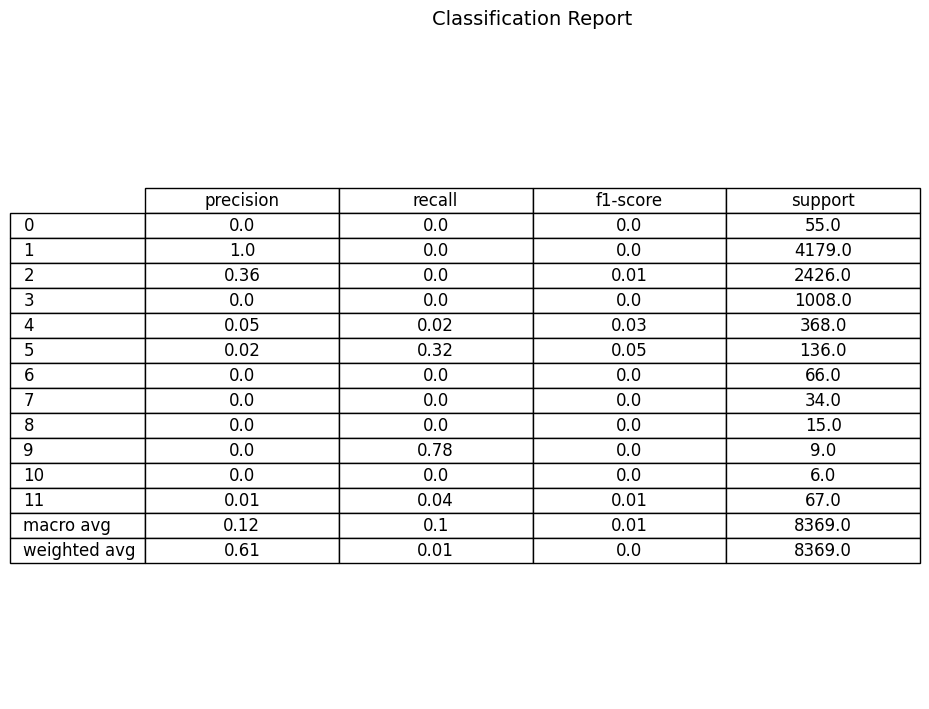

In [ ]:
report = classification_report(y_test, logreg_y_pred, output_dict=True)

report_df = pd.DataFrame(report).transpose()
report_df = report_df.drop('accuracy', axis=0)
fig, ax = plt.subplots(figsize=(10, len(report_df)*0.6))
ax.axis('off')
table = ax.table(cellText=np.round(report_df.values, 2),
                 rowLabels=report_df.index,
                 colLabels=report_df.columns,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)

plt.title("Classification Report", fontsize=14, pad=20)
plt.show()


In [109]:
dtc = DecisionTreeClassifier(max_depth=15)

In [110]:
dtc.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [111]:
dtc_pred = dtc.predict(X_test)

In [ ]:
accuracy_score(y_test, dtc_pred)

0.46516907635320826

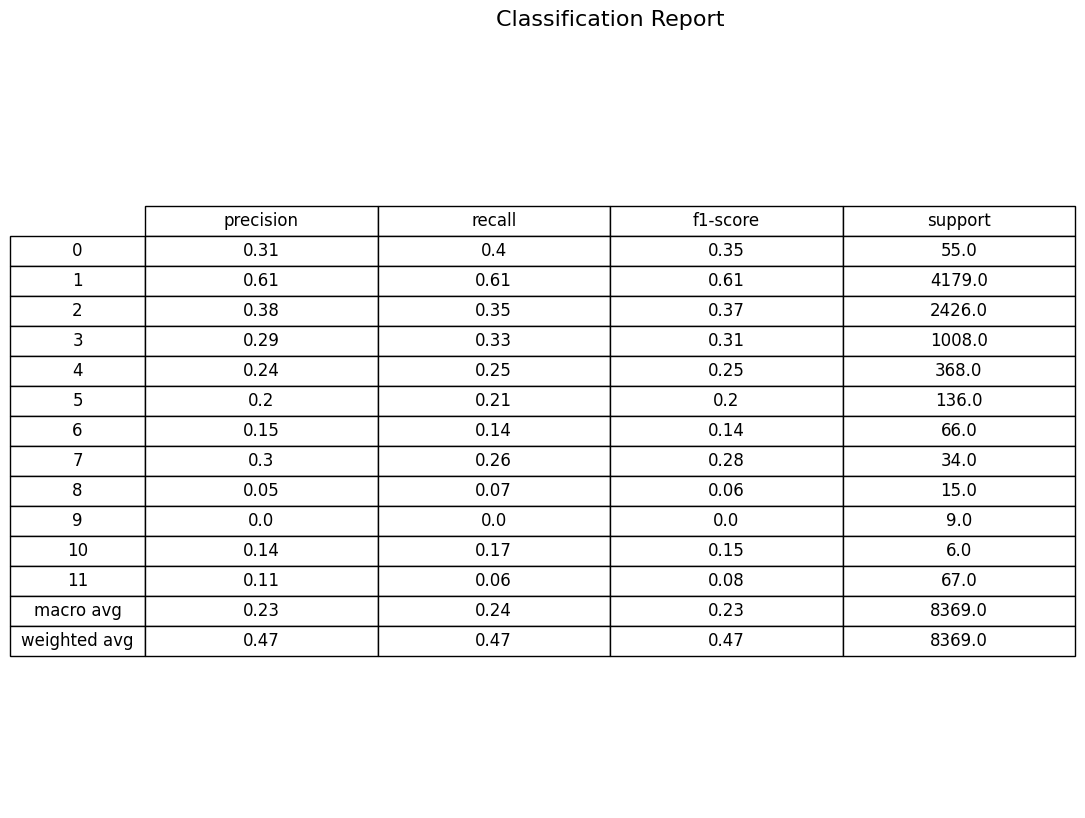

In [ ]:
report = classification_report(y_test, dtc_pred, output_dict=True)

report_df = pd.DataFrame(report).transpose()
report_df = report_df.drop('accuracy', axis=0)
fig, ax = plt.subplots(figsize=(12, len(report_df)*0.7))
ax.axis('off')
table = ax.table(cellText=np.round(report_df.values, 2),
                 rowLabels=report_df.index,    
                 colLabels=report_df.columns,
                 cellLoc='center',
                 rowLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.8) 
plt.title("Classification Report", fontsize=16, pad=20)
plt.show()